# Detecting Outliers

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed

## 1) Parametric Methods

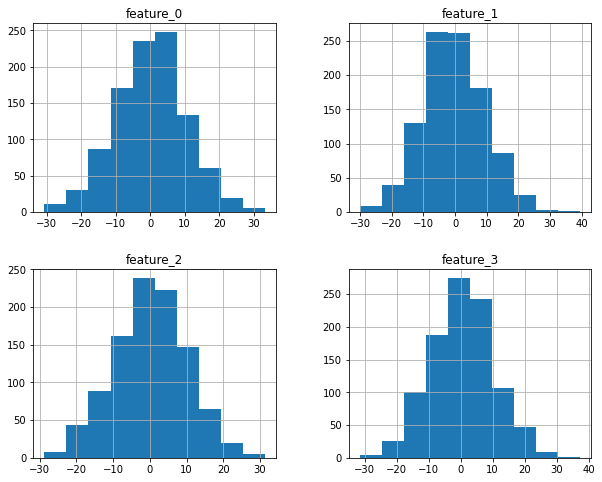

In [2]:
# Creating a dummy dataset where features have normal distributions
seed(1)
n_feats=4
df_dummy = pd.DataFrame(np.random.normal(scale=10.0, size=(1000, n_feats)),
                           columns=['feature_{}'.format(i) for i in range(n_feats)])
# all normally distributed
df_dummy.hist(figsize=(10,8));

In [3]:
df_dummy.describe()

,feature_0,feature_1,feature_2,feature_3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.130295,-0.467723,0.163857,0.649251
std,10.144231,9.967537,9.940642,9.869792
min,-30.641414,-30.160320,-28.720503,-31.533575
25%,-6.542388,-7.276946,-6.570169,-6.132045
50%,0.225131,-0.939612,0.371522,0.828764
75%,6.670833,6.081050,6.728782,7.298686
max,33.210788,39.586027,31.350473,37.402489


### Standard Deviation - Univariate Analysis

In [4]:
# Calculating summary statistics
mean, std = df_dummy['feature_0'].mean(), df_dummy['feature_0'].std()
print('mean: {}\n'.format(round(mean,3)),
     'std: {}'.format(round(std)))

mean: 0.13
 std: 10


We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.

In [5]:
# Identifying outliers
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
print('lower: {}\n'.format(round(lower)),
     'upper: {}'.format(round(upper)))

lower: -30
 upper: 31


In [6]:
outliers_std = [x for x in df_dummy['feature_0'] if x < lower or x > upper]
outliers_std

[33.21078756170365, -30.53764380426305, -30.641413561051007, 32.38343196752376]

### IQR - Univariate Analysis

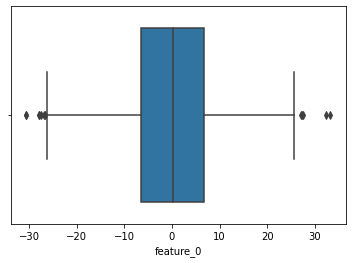

In [7]:
# Visualizing outliers with boxplot
sns.boxplot(df_dummy['feature_0'])

In [8]:
# Calculating Q1(25 percentile) & Q3(75 percentile) 
Q1 = df_dummy['feature_0'].quantile(0.25)
Q3 = df_dummy['feature_0'].quantile(0.75)

# Calculating "IQR"
IQR = Q3 - Q1

IQR

13.213220892526852

In [9]:
# Calculating lower and upper whiskers
Upper_Limit = Q3 + 1.5*IQR
Lower_Limit = Q1 - 1.5*IQR

print("Upper Limit: {}".format(Upper_Limit))
print("Lower Limit: {}".format(Lower_Limit))

Upper Limit: 26.49066422153506
Lower Limit: -26.362219348572353


In [10]:
outliers_iqr = df_dummy['feature_0'][(df_dummy['feature_0'] > Upper_Limit) | (df_dummy['feature_0'] < Lower_Limit)]
print("Outliers:\n{}".format(outliers_iqr))
print("\nNumber of Outliers: {}".format(outliers_iqr.shape[0]))

Outliers:
63    -27.930850
183    33.210788
223   -30.537644
244   -26.641259
427   -27.914440
567   -30.641414
684    27.294621
762    32.383432
771   -26.768414
783   -27.391417
969    27.061249
976    27.421552
Name: feature_0, dtype: float64

Number of Outliers: 12


### Elliptic Envelope - Multivariate Analysis

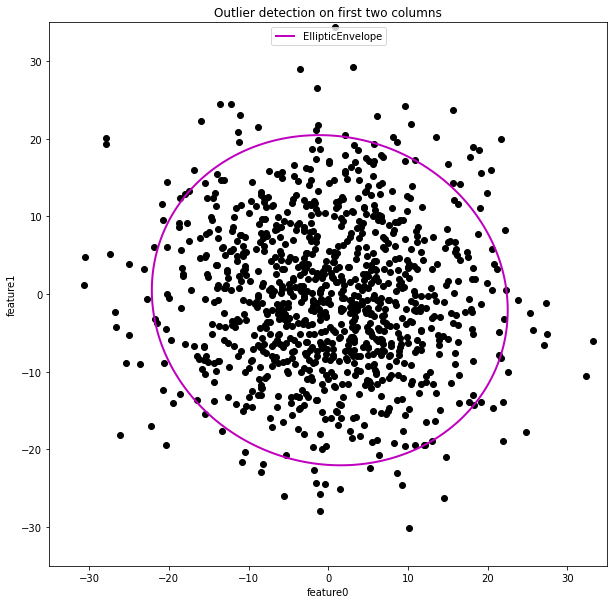

In [11]:
from sklearn.covariance import EllipticEnvelope

clf_ee = EllipticEnvelope(contamination=0.1) # 10% of the data
legend = {}

# Compare features under given settings
xx, yy = np.meshgrid(np.linspace(-35, 35, 500), np.linspace(-35, 35, 500))
plt.figure(1, figsize=(10,10))
clf_ee.fit(df_dummy.values[:,:2])

Z = clf_ee.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
legend['EllipticEnvelope'] = plt.contour(
    xx, yy, Z, levels=[0], linewidths=2, colors=['m'])

legend_values_list = list(legend.values())
legend_keys_list = list(legend.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1, figsize=(10,10))# two clusters
plt.title("Outlier detection on first two columns")
plt.scatter(df_dummy.values[:, 0], df_dummy.values[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))
plt.legend(legend_values_list[0].collections, legend_keys_list,
           loc="upper center");
plt.ylabel("feature1");
plt.xlabel("feature0");

In [12]:
# Predicting outliers
outliers_clf = clf_ee.predict(df_dummy[['feature_0', 'feature_1']])

In [13]:
outliers_clf

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1

-1 = outliers

In [14]:
pd.Series(outliers_clf).value_counts()

 1    900
-1    100
dtype: int64

We identified 100 outliers (10% from the data as we specified)

## 2) Non-Parametric Methods

In [15]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)
df.shape

(506, 14)

### Isolation Forest

In [16]:
from sklearn.ensemble import IsolationForest

#MULTIVARIATE ANALYSIS

iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(df)

# select all rows that are not outliers
mask = outliers != -1

In [17]:
df_no_outliers = df[mask]

In [18]:
df_no_outliers.shape

(455, 14)

We removed 51 outliers.

In [19]:
# UNIVARIATE ANALYSIS

column = df[10]
outliers = iso.fit_predict(column.values.reshape(-1,1))

# select all rows that are not outliers
mask = outliers != -1

In [20]:
no_outliers = column[mask]

In [21]:
no_outliers.shape

(459,)

We removed 46 outliers from column 10.

### Local Outlier Factor

In [22]:
from sklearn.neighbors import LocalOutlierFactor

# MULTIVARIATE ANALYSIS

lof = LocalOutlierFactor()
outliers = lof.fit_predict(df)

# select all rows that are not outliers
mask = outliers != -1

In [23]:
df_no_outliers = df[mask]

In [24]:
df_no_outliers.shape

(466, 14)

We removed 62 outliers.

In [25]:
# UNIVARIATE ANALYSIS

column = df[0]
outliers = lof.fit_predict(column.values.reshape(-1,1))

# select all rows that are not outliers
mask = outliers != -1

In [26]:
no_outliers = column[mask]

In [27]:
no_outliers.shape

(489,)

We removed 17 outliers from column 0.

### One-Class SVM

In [28]:
from sklearn.svm import OneClassSVM

# MULTIVARIATE ANALYSIS

oc_svm = OneClassSVM(nu=0.01)
outliers = oc_svm.fit_predict(df)

# select all rows that are not outliers
mask = outliers != -1

In [29]:
df_no_outliers = df[mask]

In [30]:
df_no_outliers.shape

(502, 14)

We removed 4 outliers.

In [31]:
# UNIVARIATE ANALYSIS

column = df[0].values.reshape(-1,1)
outliers = oc_svm.fit_predict(column)

# select all rows that are not outliers
mask = outliers != -1

In [32]:
no_outliers = column[mask]

In [33]:
no_outliers.shape

(466, 1)

We removed 40 outliers from column 0.

### DBSCAN

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [35]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Text(0.5, 1.0, 'Estimated number of clusters: 3')

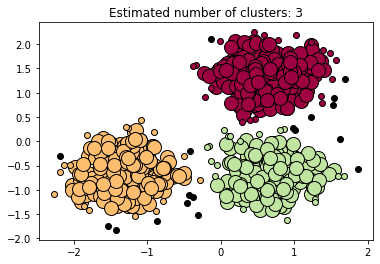

In [36]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)